In [2]:
import pandas as pd
data = pd.read_csv('processed_data.csv')

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Select features for clustering
features = ['Facility Age', 'Fencing Available Numeric', 'Lighting Available Numeric']
data_cleaned = data.dropna(subset=features)

# Extract the feature matrix
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

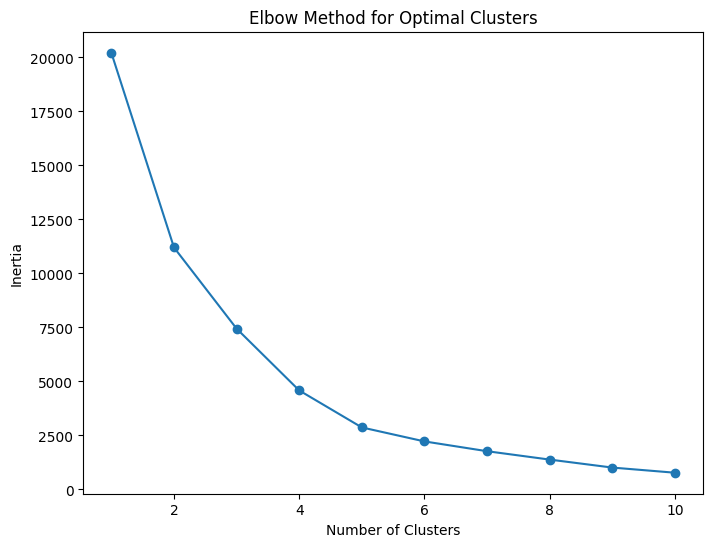

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/ps/1nrhzmyx2gn5r_v_r7dcfx880000gn/T/ipykernel_13738/2803909247.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.labels_


In [10]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (e.g., k=3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
data_cleaned['Cluster'] = kmeans.labels_

In [12]:
# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for 3 clusters: 0.49


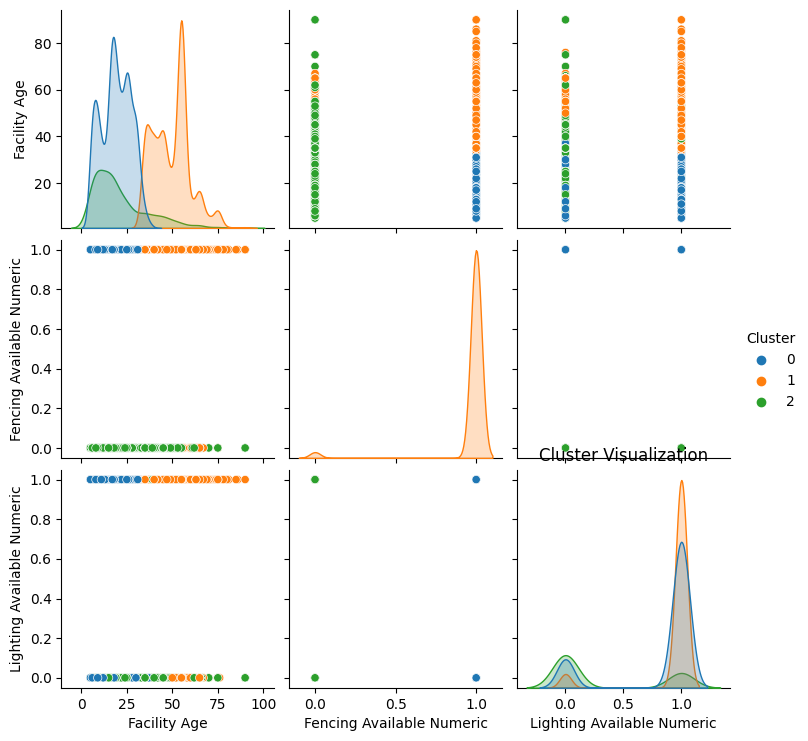

Cluster
0    2979
1    2547
2    1213
Name: count, dtype: int64


In [15]:
# Visualize clusters using a pairplot
sns.pairplot(data_cleaned, vars=features, hue='Cluster', palette='tab10', diag_kind='kde')
plt.title("Cluster Visualization")
plt.show()

# Display the distribution of facilities in each cluster
print(data_cleaned['Cluster'].value_counts())